<a href="https://colab.research.google.com/github/Raphael-Blaize/Football-Mchezo-pesa-Project--analysis-and-modelling/blob/main/MCHEZO_PESA_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MCHEZO PESA PROJECT

## 1. Defining the Question

### a) Specifying the Question


> You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

> A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training)



### b) Defining the Metric for Success

> Able to predcit the winning team based on : 

        1. Home team or away team

> Have a low RMSE score and also look at other metrcis to see how they affect the model in general 

> No multicollinearity in the dataset in-order to acchive accurate results 

> Ensuring that the data has been preproccesed well this includes:

        1. Taking care of Outliers
        2. Taking care of missing values 
        3. Taking care of column names 
        4. Taking care of special character if there is any

> Ensuring that my datasett has also been encoded properly before applying it to the model for training 

### c) Understanding the context 

> The men's FIFA World Ranking is a ranking system for men's national teams in association football, currently led by Belgium. The teams of the men's member nations of FIFA, football's world governing body, are ranked based on their game results with the most successful teams being ranked highest. The rankings were introduced in December 1992, and eight teams (Argentina, Belgium, Brazil, France, Germany, Italy, the Netherlands and Spain) have held the top position, of which Brazil have spent the longest ranked first.

> A points system is used, with points being awarded based on the results of all FIFA-recognised full international matches.

> The ranking system has been revamped on several occasions, generally responding to criticism that the preceding calculation method did not effectively reflect the relative strengths of the national teams. The current version of the ranking system was first used on 16 August 2018, adapted from the Elo rating system used in chess and Go.

> After a long period testing and analysing the best way to calculate the FIFA/Coca-Cola World Ranking, a new model took effect in August 2018 after approval by the FIFA Council.

> This new version developed by FIFA was named "SUM" as it relies on adding/subtracting points won or lost for a game to/from the previous point totals rather than averaging game points over a given time period as in the previous version of the World Ranking.

> The points which are added or subtracted are partially determined by the relative strength of the two opponents, including the logical expectation that teams higher in the ranking should fare better against teams lower in the ranking.


### d) Recording the Experimental Design

> We will be conducting an EDA Analysis of the data in -order to understand the relationship in the variables by:

         1. Univariate analysis
         2. Bivarate analysis 
         3. Multi-variate analysis where needed

> We will also see the correlation between the variables using: 

         1. Heatmap to see the correlation
         2. Pearsons correlation 
         3. Chi squared where possible 

> Modelling approach:

         1. Checking for Multicollinearity and Heteroskedasticity in our dataset using 
               a) VIF score to see if our dataset has multicollinearity
               b) Residual plots and if applicabel a bartletts test to see if our model can be used 

         2. Metrics
               a) Computing  for different metrics such as 
                     i) RMSE
                     ii) MSE
                     iii) MAE

        3. Cross-validation Techniques
               a) K-fold 

        4. Regression algorithm
               a) Polynomial Regression

        5. Classification Algorithm
                a) Logistic Regression




## **DATASETS USED IN THIS ANALYSIS**

The Datset files used in this analysis are found from kaggle where we have the csv files. 

link : https://drive.google.com/open?id=1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc









## **DATA SECTION**

### **IMPORTING THE LIBRARIES WE NEED AND LOOKING THROUGH OUR DATASET TO UNDERSTAND IT BETTER**

In [2]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### RANKING DATASET 

In [3]:
#Reading our dataset
ranking = pd.read_csv('fifa_ranking.csv')
ranking.head(10)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
5,6,Republic of Ireland,IRL,0.0,54,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
6,7,Russia,RUS,0.0,52,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
7,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
8,9,Norway,NOR,0.0,49,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
9,10,Denmark,DEN,0.0,51,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


##### RAKING DATASET PREPROCESSING SECTION

In [4]:
# checking the info on our ranking dataset 
ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

we have 57793 rows and 16 columns in the ranking dataset 

In [5]:
#cheking for null values 
ranking.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

No null values in the dataset so there is no need to drop of fillna 

In [6]:
#cheking for duplicates in the dataset 
ranking.duplicated().sum()

37

we have duplicated rows in the dataset i think its best if we drop the duplicated rows

In [7]:
#dropping duplicates
r2 = ranking.drop_duplicates()
r2

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07


In [8]:
r2.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

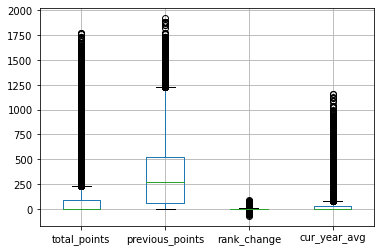

In [9]:
#cheking for outliers in the dataset 
boxplot = r2.boxplot(column = ['total_points',
       'previous_points', 'rank_change', 'cur_year_avg'])

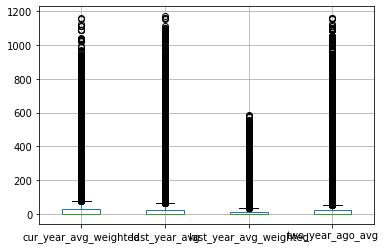

In [10]:
boxplot = r2.boxplot(column = ['cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg'])

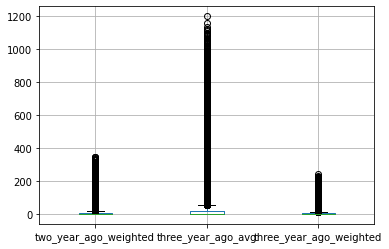

In [11]:
boxplot = r2.boxplot(column = ['two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted'])

My ranking dataset contains alot of outliers i do not want to drop them beacuse there could be a reason why this outlier are there and dropping them might lead to innsuffient ammount of data in 1. modelling and also 2.analysis, so it is better to leave them but we should be carefull because the data shows me there is abit of bias but we can perfrom normaltiy tests to ensure that our data is kind of normalised

In [12]:
#preview of the dtypes of te columns 
r2.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [13]:
#changing the dattype column with rank_date to datetime 
r2["rank_date"] = pd.to_datetime(r2["rank_date"])

#previewing the dtypes after changing the rank_date column 
r2.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
dtype: object

We now need to select the relevant columns we need for modelling and also for analysis so we need to select the target variables that we will use 

So our original plan or rather objective is to create a model that can predict results of a football match 

so we will need 

    1. Rank 
    2. Country
    3. Home_team
    4. Away_team
    5. Sum of the weighted points
    6. Home score
    7. Away score

In [14]:
#chossing relevant columns in the ranking dataset 
r2.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

Reason for choosing wighted averages  
 
A weighted average is the average of a data set that recognizes certain numbers as more important than others. Weighted averages are commonly used in statistical analysis, stock portfolios and teacher grading averages.

In [15]:
r3 = r2[['rank', 'country_full', 'last_year_avg_weighted', 'cur_year_avg_weighted','two_year_ago_weighted', 'three_year_ago_weighted', 'rank_date']]
r3

,rank,country_full,last_year_avg_weighted,cur_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,rank_date
0,1,Germany,0.0,0.0,0.0,0.0,1993-08-08
1,2,Italy,0.0,0.0,0.0,0.0,1993-08-08
2,3,Switzerland,0.0,0.0,0.0,0.0,1993-08-08
3,4,Sweden,0.0,0.0,0.0,0.0,1993-08-08
4,5,Argentina,0.0,0.0,0.0,0.0,1993-08-08
...,...,...,...,...,...,...,...
57788,206,Anguilla,0.0,0.0,0.0,0.0,2018-06-07
57789,206,Bahamas,0.0,0.0,0.0,0.0,2018-06-07
57790,206,Eritrea,0.0,0.0,0.0,0.0,2018-06-07
57791,206,Somalia,0.0,0.0,0.0,0.0,2018-06-07


Getting the sum of the weighted scores 


In [16]:
r3['weighted_points'] =  r3['cur_year_avg_weighted'] + r3['two_year_ago_weighted'] + r3['three_year_ago_weighted'] + r3["last_year_avg_weighted"]
r3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,rank,country_full,last_year_avg_weighted,cur_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,rank_date,weighted_points
0,1,Germany,0.0,0.0,0.0,0.0,1993-08-08,0.0
1,2,Italy,0.0,0.0,0.0,0.0,1993-08-08,0.0
2,3,Switzerland,0.0,0.0,0.0,0.0,1993-08-08,0.0
3,4,Sweden,0.0,0.0,0.0,0.0,1993-08-08,0.0
4,5,Argentina,0.0,0.0,0.0,0.0,1993-08-08,0.0
...,...,...,...,...,...,...,...,...
57788,206,Anguilla,0.0,0.0,0.0,0.0,2018-06-07,0.0
57789,206,Bahamas,0.0,0.0,0.0,0.0,2018-06-07,0.0
57790,206,Eritrea,0.0,0.0,0.0,0.0,2018-06-07,0.0
57791,206,Somalia,0.0,0.0,0.0,0.0,2018-06-07,0.0


In [17]:
r3.columns


Index(['rank', 'country_full', 'last_year_avg_weighted',
       'cur_year_avg_weighted', 'two_year_ago_weighted',
       'three_year_ago_weighted', 'rank_date', 'weighted_points'],
      dtype='object')

In [18]:
r3["rank_date"].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   57756
unique                    286
top       2017-04-06 00:00:00
freq                      211
first     1993-08-08 00:00:00
last      2018-06-07 00:00:00
Name: rank_date, dtype: object

In [19]:
#chaning the date columns to years 
r3["Year"] = r3["rank_date"].dt.year
r3.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,rank,country_full,last_year_avg_weighted,cur_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,rank_date,weighted_points,Year
0,1,Germany,0.0,0.0,0.0,0.0,1993-08-08,0.0,1993
1,2,Italy,0.0,0.0,0.0,0.0,1993-08-08,0.0,1993
2,3,Switzerland,0.0,0.0,0.0,0.0,1993-08-08,0.0,1993
3,4,Sweden,0.0,0.0,0.0,0.0,1993-08-08,0.0,1993
4,5,Argentina,0.0,0.0,0.0,0.0,1993-08-08,0.0,1993


In [20]:
r31 = r3[r3['rank_date'] > '2011-08-24']
r31

,rank,country_full,last_year_avg_weighted,cur_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,rank_date,weighted_points,Year
40585,1,Spain,503.89,656.13,237.69,207.45,2011-09-21,1605.16,2011
40586,2,Netherlands,481.57,727.05,239.62,122.57,2011-09-21,1570.81,2011
40587,3,Germany,460.73,557.21,148.20,123.85,2011-09-21,1289.99,2011
40588,4,Uruguay,392.27,589.71,111.01,91.07,2011-09-21,1184.06,2011
40589,5,Portugal,296.06,638.67,125.09,98.40,2011-09-21,1158.22,2011
...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,0.00,0.00,0.00,0.00,2018-06-07,0.00,2018
57789,206,Bahamas,0.00,0.00,0.00,0.00,2018-06-07,0.00,2018
57790,206,Eritrea,0.00,0.00,0.00,0.00,2018-06-07,0.00,2018
57791,206,Somalia,0.00,0.00,0.00,0.00,2018-06-07,0.00,2018


In [21]:
#final Ranking dataset to use 
r4 = r31[['rank', 'country_full', 'weighted_points', "Year"]]
r4

,rank,country_full,weighted_points,Year
40585,1,Spain,1605.16,2011
40586,2,Netherlands,1570.81,2011
40587,3,Germany,1289.99,2011
40588,4,Uruguay,1184.06,2011
40589,5,Portugal,1158.22,2011
...,...,...,...,...
57788,206,Anguilla,0.00,2018
57789,206,Bahamas,0.00,2018
57790,206,Eritrea,0.00,2018
57791,206,Somalia,0.00,2018


#### RESULTS DATASET

In [22]:
#Reading our dataset
results = pd.read_csv('results.csv')
results.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


##### RESULTS DATASET PREPROCESSING SECTION

In [23]:
# checking the info on our ranking dataset 
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


we have 40839 rows and 9 columns in the ranking dataset 

In [24]:
#cheking for null values 
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [25]:
#cheking for duplicates in the dataset 
results.duplicated().sum()

0

In [26]:
#cheking the data types in our columns
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

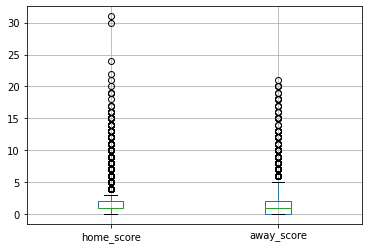

In [27]:
#cheking for outliers in the dataset 
boxplot = results.boxplot(column = ["home_score", "away_score"])

There are outlers in our home score and away score columns but i will not drop them because there must be a reason for those outliers 

In [28]:
#changing the dataype column with rank_date to datetime 
results["date"] = pd.to_datetime(results["date"])

#previewing the dtypes after changing the rank_date column 
results.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [29]:
#looking out our datetime colunmn more in-depth 
results["date"].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                   40839
unique                  15115
top       2012-02-29 00:00:00
freq                       66
first     1872-11-30 00:00:00
last      2019-07-20 00:00:00
Name: date, dtype: object

From the ranking start date here: [link](https://colab.research.google.com/drive/1OQvv2j5OQ9FyrYvx0k3j5FxVzOgxGjIW#scrollTo=j9vy3IoOmQAl&line=1&uniqifier=1):
 > We can see that the start date in the ranking dataset was 1993-08-08 00:00:00 compared to results which was 1872-11-30 00:00:00, so we need the drop the rows in the results that are before 1993-08-08 00:00:00

 > Similarly we can also see the last date in the ranking dataset was 2018-06-07 00:00:00 compared to the last in the results which was 2019-07-20 00:00:00, so we need to drop anything after 2018-06-07 00:00:00 because it wont have any records in the ranking dataset

In [30]:
# Ensuring standardization in the results dataset
re1 = results[(results["date"] > "2011-08-24") & (results["date"] < "2018-06-07")]
re1

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
33281,2011-08-25,United Arab Emirates,Qatar,3,1,Friendly,al-Ain,United Arab Emirates,False
33282,2011-08-26,Bahrain,Sudan,1,0,Friendly,Riffa,Bahrain,False
33283,2011-08-27,Angola,DR Congo,1,2,Friendly,Dundo,Angola,False
33284,2011-08-27,Fiji,Tahiti,3,0,Pacific Games,Boulari,New Caledonia,True
33285,2011-08-27,Jordan,Indonesia,1,0,Friendly,Amman,Jordan,False
...,...,...,...,...,...,...,...,...,...
39815,2018-06-06,Czech Republic,Nigeria,1,0,Friendly,Schwechat,Austria,True
39816,2018-06-06,Belgium,Egypt,3,0,Friendly,Brussels,Belgium,False
39817,2018-06-06,Belarus,Hungary,1,1,Friendly,Brest,Belarus,False
39818,2018-06-06,Zambia,Madagascar,1,0,COSAFA Cup,Polokwane,South Africa,True


In [31]:
#chaning the date columns to years 
re1["Year"] = results["date"].dt.year
re1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year
33281,2011-08-25,United Arab Emirates,Qatar,3,1,Friendly,al-Ain,United Arab Emirates,False,2011
33282,2011-08-26,Bahrain,Sudan,1,0,Friendly,Riffa,Bahrain,False,2011
33283,2011-08-27,Angola,DR Congo,1,2,Friendly,Dundo,Angola,False,2011
33284,2011-08-27,Fiji,Tahiti,3,0,Pacific Games,Boulari,New Caledonia,True,2011
33285,2011-08-27,Jordan,Indonesia,1,0,Friendly,Amman,Jordan,False,2011


In [32]:
re1.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'Year'],
      dtype='object')

In [33]:
#chossing relevant columns in the results dataset 
re2 = re1.drop(columns = ['date', 'country', 'city'])
re2

,home_team,away_team,home_score,away_score,tournament,neutral,Year
33281,United Arab Emirates,Qatar,3,1,Friendly,False,2011
33282,Bahrain,Sudan,1,0,Friendly,False,2011
33283,Angola,DR Congo,1,2,Friendly,False,2011
33284,Fiji,Tahiti,3,0,Pacific Games,True,2011
33285,Jordan,Indonesia,1,0,Friendly,False,2011
...,...,...,...,...,...,...,...
39815,Czech Republic,Nigeria,1,0,Friendly,True,2018
39816,Belgium,Egypt,3,0,Friendly,False,2018
39817,Belarus,Hungary,1,1,Friendly,False,2018
39818,Zambia,Madagascar,1,0,COSAFA Cup,True,2018


#### MERGING THE DATASETS

In [34]:
# Joining the datasets to form one dataset
Final1 = re2.merge(r4, left_on = ["home_team", "Year"], right_on=["country_full", "Year"], how = "inner")
Final2 = Final1.merge(r4, left_on = ["away_team", "Year"], right_on=["country_full", "Year"], how = "inner")
Final2

,home_team,away_team,home_score,away_score,tournament,neutral,Year,rank_x,country_full_x,weighted_points_x,rank_y,country_full_y,weighted_points_y
0,United Arab Emirates,Qatar,3,1,Friendly,False,2011,112,United Arab Emirates,287.37,100,Qatar,349.71
1,United Arab Emirates,Qatar,3,1,Friendly,False,2011,112,United Arab Emirates,287.37,92,Qatar,371.38
2,United Arab Emirates,Qatar,3,1,Friendly,False,2011,112,United Arab Emirates,287.37,95,Qatar,375.02
3,United Arab Emirates,Qatar,3,1,Friendly,False,2011,112,United Arab Emirates,287.37,93,Qatar,377.71
4,United Arab Emirates,Qatar,3,1,Friendly,False,2011,113,United Arab Emirates,276.21,100,Qatar,349.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...
669079,Belarus,Hungary,1,1,Friendly,False,2018,78,Belarus,417.41,49,Hungary,630.02
669080,Belarus,Hungary,1,1,Friendly,False,2018,78,Belarus,417.41,50,Hungary,637.31
669081,Belarus,Hungary,1,1,Friendly,False,2018,78,Belarus,417.41,50,Hungary,603.77
669082,Belarus,Hungary,1,1,Friendly,False,2018,78,Belarus,417.41,49,Hungary,603.77


In [35]:
#renaming columns to their respective names 
Final2.rename(columns = {
    "rank_y" : "away_team_rank",
    "rank_x" : "home_team_rank",
    "weighted_points_x" : "home_team_weighted_points",
    "weighted_points_y" : "away_team_weighted_points"
}, inplace = True)

Final2

,home_team,away_team,home_score,away_score,tournament,neutral,Year,home_team_rank,country_full_x,home_team_weighted_points,away_team_rank,country_full_y,away_team_weighted_points
0,United Arab Emirates,Qatar,3,1,Friendly,False,2011,112,United Arab Emirates,287.37,100,Qatar,349.71
1,United Arab Emirates,Qatar,3,1,Friendly,False,2011,112,United Arab Emirates,287.37,92,Qatar,371.38
2,United Arab Emirates,Qatar,3,1,Friendly,False,2011,112,United Arab Emirates,287.37,95,Qatar,375.02
3,United Arab Emirates,Qatar,3,1,Friendly,False,2011,112,United Arab Emirates,287.37,93,Qatar,377.71
4,United Arab Emirates,Qatar,3,1,Friendly,False,2011,113,United Arab Emirates,276.21,100,Qatar,349.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...
669079,Belarus,Hungary,1,1,Friendly,False,2018,78,Belarus,417.41,49,Hungary,630.02
669080,Belarus,Hungary,1,1,Friendly,False,2018,78,Belarus,417.41,50,Hungary,637.31
669081,Belarus,Hungary,1,1,Friendly,False,2018,78,Belarus,417.41,50,Hungary,603.77
669082,Belarus,Hungary,1,1,Friendly,False,2018,78,Belarus,417.41,49,Hungary,603.77


###### DATA PREPRCESSING THE MERGED DATASET

In [36]:
#checking for null values 
Final2.isnull().sum()

home_team                    0
away_team                    0
home_score                   0
away_score                   0
tournament                   0
neutral                      0
Year                         0
home_team_rank               0
country_full_x               0
home_team_weighted_points    0
away_team_rank               0
country_full_y               0
away_team_weighted_points    0
dtype: int64

In [37]:
#cheking the shape of our datast 
Final2.shape

(669084, 13)

In [38]:
#checking for duplicates
Final2.duplicated().sum()

135121

In [39]:
#dropping the duplicates in our dataset
f3 = Final2.drop_duplicates()
f3.shape

(533963, 13)

### EDA ANALYSIS

#### **PERFORMING UNIVARIATE ANALYSIS** 

#### a) Categorical and Categorical

> Frequency distribution

In [74]:
f3.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'neutral', 'Year', 'home_team_rank', 'country_full_x',
       'home_team_weighted_points', 'away_team_rank', 'country_full_y',
       'away_team_weighted_points'],
      dtype='object')

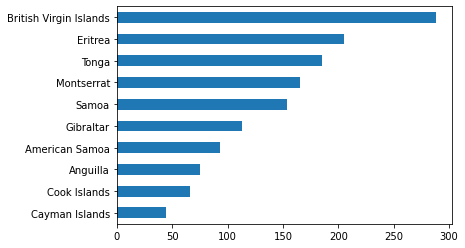

In [75]:
f3.home_team.value_counts().sort_values().head(10).plot(kind = 'barh')

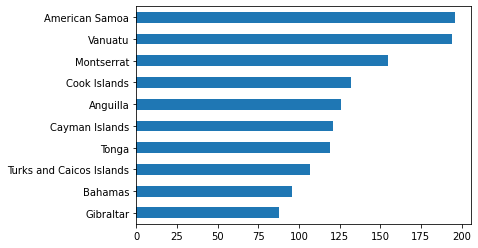

In [76]:
f3.away_team.value_counts().sort_values().head(10).plot(kind = 'barh')

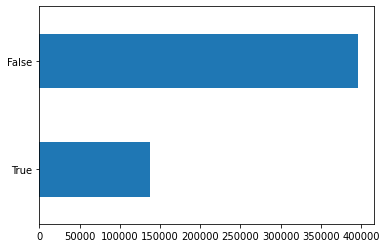

In [77]:
f3.neutral.value_counts().sort_values().head(10).plot(kind = 'barh')

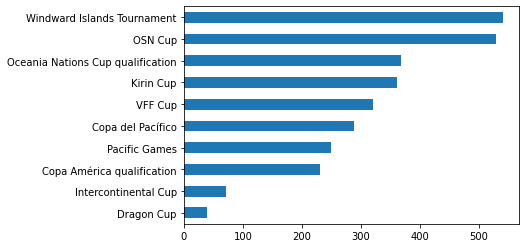

In [78]:
f3.tournament.value_counts().sort_values().head(10).plot(kind = 'barh')

#### b) Numerical varibales

##### Measures of central tendancy 

In [79]:
#Mean
print('Mean')
home_score_mean = f3['home_score'].mean()
print('The mean for home_score	 is :',home_score_mean)

away_score_mean = f3['away_score'].mean()
print('The mean for away_score is :',away_score_mean)

home_team_rank_mean = f3['home_team_rank'].mean()
print('The mean for home_team_rank is :',home_team_rank_mean)

away_team_rank_mean = f3['away_team_rank'].mean()
print('The mean for away_team_rank is :',away_team_rank_mean)

home_team_weighted_points_mean = f3['home_team_weighted_points'].mean()
print('The mean for home_team_weighted_points is :',home_team_weighted_points_mean)

away_team_weighted_points_mean = f3['away_team_weighted_points'].mean()
print('The mean for away_team_weighted_points is :',away_team_weighted_points_mean)

Mean
The mean for home_score	 is : 1.5148352975767985
The mean for away_score is : 1.027956993274815
The mean for home_team_rank is : 81.16056730522527
The mean for away_team_rank is : 84.86384262579992
The mean for home_team_weighted_points is : 521.1260000412487
The mean for away_team_weighted_points is : 497.8569639469413


In [80]:
#Median
print('Median')
home_score_median = f3['home_score'].median()
print('The median for home_score	 is :',home_score_median)

away_score_median = f3['away_score'].median()
print('The median for away_score is :',away_score_median)

home_team_rank_median = f3['home_team_rank'].median()
print('The median for home_team_rank is :',home_team_rank_median)

away_team_rank_median = f3['away_team_rank'].median()
print('The median for away_team_rank is :',away_team_rank_median)

home_team_weighted_points_median = f3['home_team_weighted_points'].median()
print('The median for home_team_weighted_points is :',home_team_weighted_points_median)

away_team_weighted_points_median= f3['away_team_weighted_points'].median()
print('The median for away_team_weighted_points is :',away_team_weighted_points_median)

Median
The median for home_score	 is : 1.0
The median for away_score is : 1.0
The median for home_team_rank is : 77.0
The median for away_team_rank is : 81.0
The median for home_team_weighted_points is : 446.71000000000004
The median for away_team_weighted_points is : 424.78999999999996


##### Measures of central dispersion

In [81]:
print('Var')
home_score_variance = f3['home_score'].var()
print('The variance for home_score	 is :',home_score_variance)

away_score_variance = f3['away_score'].var()
print('The variance for away_score is :',away_score_variance)

home_team_rank_variance = f3['home_team_rank'].var()
print('The variance for home_team_rank is :',home_team_rank_variance)

away_team_rank_variance = f3['away_team_rank'].var()
print('The variance for away_team_rank is :',away_team_rank_variance)

home_team_weighted_points_variance = f3['home_team_weighted_points'].var()
print('The variance for home_team_weighted_points is :',home_team_weighted_points_variance)

away_team_weighted_points_variance= f3['away_team_weighted_points'].var()
print('The variance for away_team_weighted_points is :',away_team_weighted_points_variance)

Var
The variance for home_score	 is : 2.132221454316612
The variance for away_score is : 1.4048427753403507
The variance for home_team_rank is : 2659.563407959398
The variance for away_team_rank is : 2718.271363787264
The variance for home_team_weighted_points is : 112585.79733141245
The variance for away_team_weighted_points is : 107301.36088065094


In [82]:
#cheking for skewness in my data
i = f3.skew()
print(i)

home_score                   1.704229
away_score                   1.575133
neutral                      1.111045
Year                         0.114708
home_team_rank               0.308040
home_team_weighted_points    0.942662
away_team_rank               0.254165
away_team_weighted_points    0.984647
dtype: float64


In [83]:
#finding positviley or negatively skewed data 
for s in i :
  if s > 0 :
    print("Positively skewed\n") 
  elif s == 0 :
    print("Symmetric distribution\n")
  else:
    print("negatively skewed\n")

Positively skewed

Positively skewed

Positively skewed

Positively skewed

Positively skewed

Positively skewed

Positively skewed

Positively skewed



In [84]:
#finding the kurtosis
z = f3.kurt()
print(z)

home_score                   5.872602
away_score                   3.712857
neutral                     -0.765582
Year                        -1.168928
home_team_rank              -0.870418
home_team_weighted_points    0.500155
away_team_rank              -0.908483
away_team_weighted_points    0.653781
dtype: float64


In [85]:
#finding the different types of kurtosis
for k in z:
  if  k > 0:
    print('It is leptokurtic\n')
  elif k < 0:
    print('It is platykurtic\n')
  else:
    print('It is mesokurtic\n') 

It is leptokurtic

It is leptokurtic

It is platykurtic

It is platykurtic

It is platykurtic

It is leptokurtic

It is platykurtic

It is leptokurtic



#### **PERFORMING BIVARIATE ANALYSIS** 

##### Stacked column charts 

In [86]:
#Frirst we need to group our data by home_score and has a neutral
# Neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue
f4 = f3.groupby(['home_score','neutral'])
f4

In [87]:
#We need to determine the proportion of True and False in the neutral, basically
#we will use the size function to count the number of rows in each grouping
f4.size()

home_score  neutral
0           False       97837
            True        41240
1           False      123626
            True        46025
2           False       95230
            True        27666
3           False       45592
            True        11966
4           False       18506
            True         6133
5           False        7811
            True         1927
6           False        4176
            True         1193
7           False        1672
            True          547
8           False        1442
            True          242
9           False          45
            True           88
10          False         395
            True          303
11          False           9
12          False          88
14          False         108
15          False          96
dtype: int64

In [88]:
# We will then use the unstack methodtop convert the results into a more readable format and
# proceed to store it in a new variable
f5 = f4.size().unstack()
f5

neutral,False,True
home_score,,
0,97837.0,41240.0
1,123626.0,46025.0
2,95230.0,27666.0
3,45592.0,11966.0
4,18506.0,6133.0
5,7811.0,1927.0
6,4176.0,1193.0
7,1672.0,547.0
8,1442.0,242.0


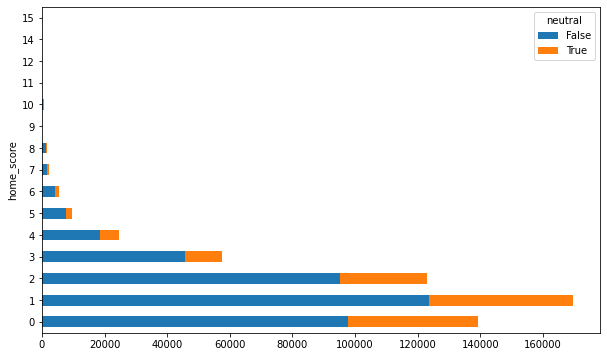

In [89]:
f5.plot(kind='barh', stacked=True, figsize=[10,6])

From the above bi-variate analysis we can see that there were more home_scores in a place where the venue was not neutral, compared to cases where the match took place in a neutral venue 

In [90]:
#First we need to group our data by home_score and has a neutral
# Neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue

f = f3.groupby(['away_score','neutral'])
f

In [91]:
#We need to determine the proportion of True and False in the neutral, basically
#we will use the size function to count the number of rows in each grouping
f.size()

away_score  neutral
0           False      171556
            True        48140
1           False      126069
            True        44458
2           False       60342
            True        27344
3           False       24920
            True         9689
4           False        8684
            True         5126
5           False        2870
            True         1246
6           False        1453
            True          590
7           False         413
            True          524
8           False         326
            True           61
9           True           88
10          True           64
dtype: int64

In [92]:
# We will then use the unstack methodtop convert the results into a more readable format and
# proceed to store it in a new variable
f_away = f.size().unstack()
f_away

neutral,False,True
away_score,,
0,171556.0,48140.0
1,126069.0,44458.0
2,60342.0,27344.0
3,24920.0,9689.0
4,8684.0,5126.0
5,2870.0,1246.0
6,1453.0,590.0
7,413.0,524.0
8,326.0,61.0


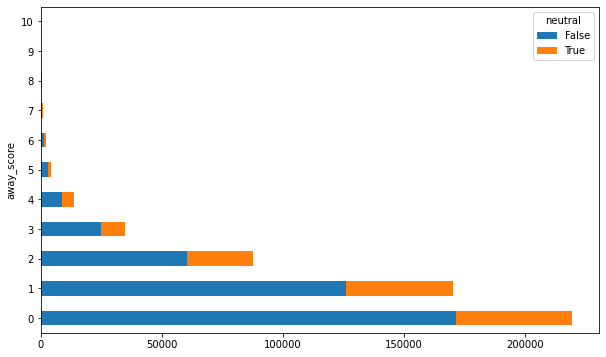

In [93]:
f_away.plot(kind='barh', stacked=True, figsize=[10,6])

From the bivariate analysis above we can see that there were more goals scores from the away team when played in a venue that is not neutral comapred to when the venue is nuetral 

#####  Scatter plots

Text(0, 0.5, 'home_team_weighted_points')

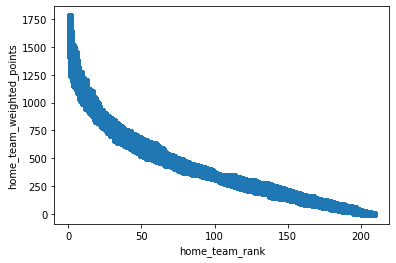

In [94]:
x = f3["home_team_rank"]
y = f3["home_team_weighted_points"]
plt.scatter(x, y)
plt.xlabel("home_team_rank")
plt.ylabel("home_team_weighted_points")

There is a negative relationship between the home team rank and the home_team_weighted_points, this means as the home_team_weighted_points decreases the home_team_rank increases


Text(0, 0.5, 'away_team_weighted_points')

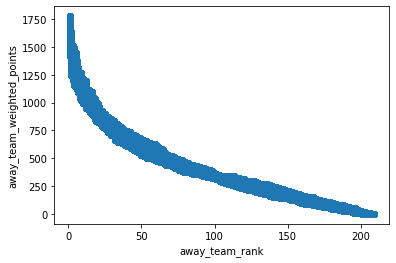

In [95]:
x1 = f3["away_team_rank"]
y1 = f3["away_team_weighted_points"]
plt.scatter(x1, y1)
plt.xlabel("away_team_rank")
plt.ylabel("away_team_weighted_points")

There is a negative relationship between the away team rank and the away_team_weighted_points, this means as the away_team_weighted_points decreases the away_team_rank increases


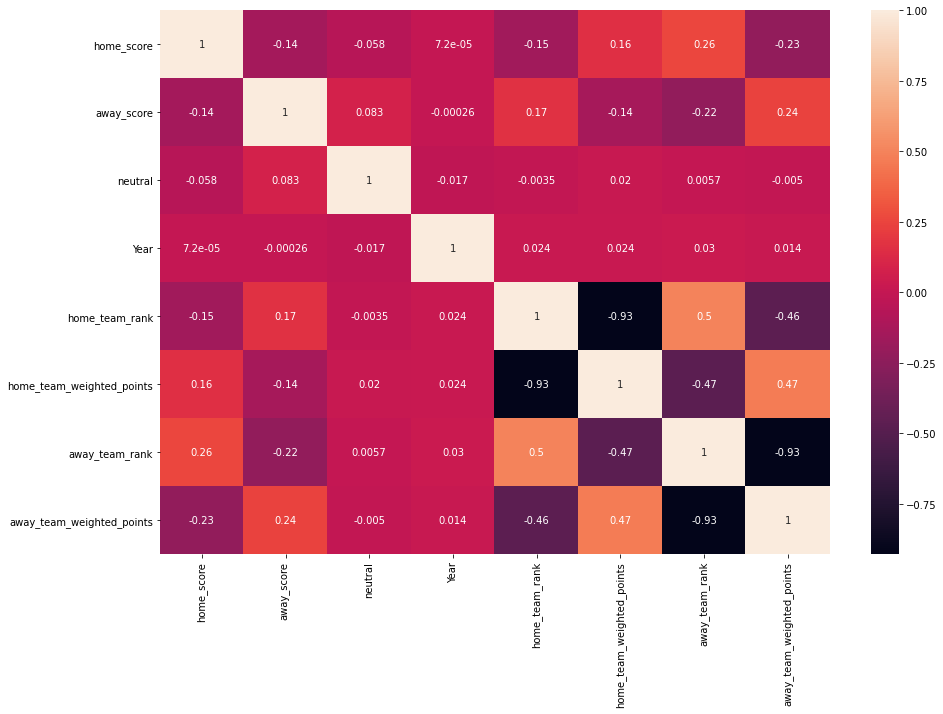

In [96]:
# showing correlation on a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(f3.corr(),annot=True)
plt.show()

From the correaltion heatmap we can see a clear relationship between the away_team_weighted_point and the home_team_weighted point ill peform a VIF score just to make sure so i wont drop them for now 

####  **PERFORMING MULTIVARIATE ANALYSIS**

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


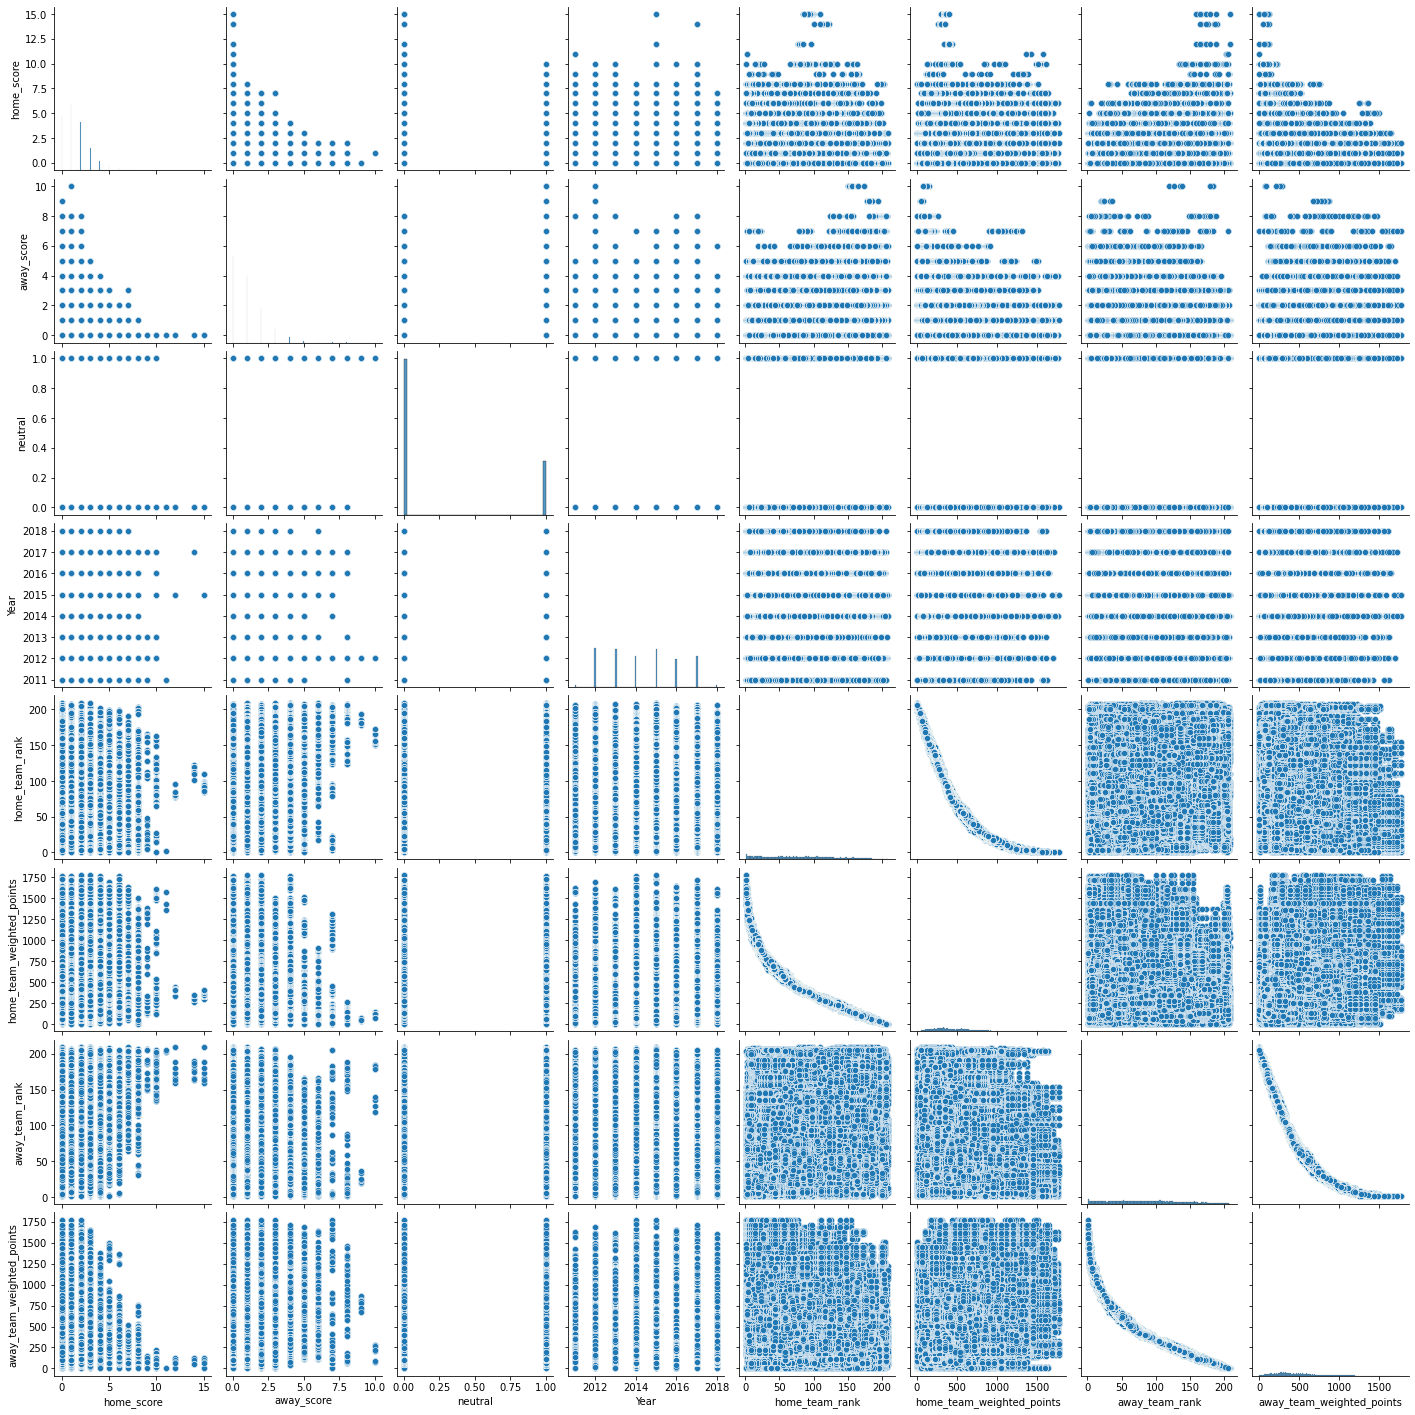

In [97]:
#Plotting a pair plot
sns.pairplot(f3)
plt.show()

### IMPLEMENTING THE SOLUTION

#### FEATURE ENGINNEERING

In [40]:
f3.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'neutral', 'Year', 'home_team_rank', 'country_full_x',
       'home_team_weighted_points', 'away_team_rank', 'country_full_y',
       'away_team_weighted_points'],
      dtype='object')

In [41]:
#Creating a new column called status
def fs(score):
  if score["home_score"] > score["away_score"]:
    stat = "Win"
  elif score["home_score"] < score["away_score"]:
    stat = "Loss"
  else:
    stat = "Draw"
  return stat

f3['Status'] = f3.apply(fs, axis = 1)    
f3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,home_team,away_team,home_score,away_score,tournament,neutral,Year,home_team_rank,country_full_x,home_team_weighted_points,away_team_rank,country_full_y,away_team_weighted_points,Status
0,United Arab Emirates,Qatar,3,1,Friendly,False,2011,112,United Arab Emirates,287.37,100,Qatar,349.71,Win
1,United Arab Emirates,Qatar,3,1,Friendly,False,2011,112,United Arab Emirates,287.37,92,Qatar,371.38,Win
2,United Arab Emirates,Qatar,3,1,Friendly,False,2011,112,United Arab Emirates,287.37,95,Qatar,375.02,Win
3,United Arab Emirates,Qatar,3,1,Friendly,False,2011,112,United Arab Emirates,287.37,93,Qatar,377.71,Win
4,United Arab Emirates,Qatar,3,1,Friendly,False,2011,113,United Arab Emirates,276.21,100,Qatar,349.71,Win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669079,Belarus,Hungary,1,1,Friendly,False,2018,78,Belarus,417.41,49,Hungary,630.02,Draw
669080,Belarus,Hungary,1,1,Friendly,False,2018,78,Belarus,417.41,50,Hungary,637.31,Draw
669081,Belarus,Hungary,1,1,Friendly,False,2018,78,Belarus,417.41,50,Hungary,603.77,Draw
669082,Belarus,Hungary,1,1,Friendly,False,2018,78,Belarus,417.41,49,Hungary,603.77,Draw


In [42]:
#cheking the column datatypes 
f3.dtypes

home_team                     object
away_team                     object
home_score                     int64
away_score                     int64
tournament                    object
neutral                         bool
Year                           int64
home_team_rank                 int64
country_full_x                object
home_team_weighted_points    float64
away_team_rank                 int64
country_full_y                object
away_team_weighted_points    float64
Status                        object
dtype: object

### POLYNOMIAL REGRESSION

##### MULTICOLLINEARITY

I will check for multicollinearity in my dataset but exclude the home score because that is what i want i want to presict in the first prediction so in this case it will be our dv

In [101]:
f3.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'neutral', 'Year', 'home_team_rank', 'country_full_x',
       'home_team_weighted_points', 'away_team_rank', 'country_full_y',
       'away_team_weighted_points', 'Status'],
      dtype='object')

In [49]:
#Encoding my categroical varibales
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
f3["neutral"] = le.fit_transform(f3["neutral"])
f3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,home_team,away_team,home_score,away_score,tournament,neutral,Year,home_team_rank,country_full_x,home_team_weighted_points,away_team_rank,country_full_y,away_team_weighted_points,Status
0,United Arab Emirates,Qatar,3,1,Friendly,0,2011,112,United Arab Emirates,287.37,100,Qatar,349.71,Win
1,United Arab Emirates,Qatar,3,1,Friendly,0,2011,112,United Arab Emirates,287.37,92,Qatar,371.38,Win
2,United Arab Emirates,Qatar,3,1,Friendly,0,2011,112,United Arab Emirates,287.37,95,Qatar,375.02,Win
3,United Arab Emirates,Qatar,3,1,Friendly,0,2011,112,United Arab Emirates,287.37,93,Qatar,377.71,Win
4,United Arab Emirates,Qatar,3,1,Friendly,0,2011,113,United Arab Emirates,276.21,100,Qatar,349.71,Win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669079,Belarus,Hungary,1,1,Friendly,0,2018,78,Belarus,417.41,49,Hungary,630.02,Draw
669080,Belarus,Hungary,1,1,Friendly,0,2018,78,Belarus,417.41,50,Hungary,637.31,Draw
669081,Belarus,Hungary,1,1,Friendly,0,2018,78,Belarus,417.41,50,Hungary,603.77,Draw
669082,Belarus,Hungary,1,1,Friendly,0,2018,78,Belarus,417.41,49,Hungary,603.77,Draw


In [50]:
f3["tournament"] = le.fit_transform(f3["tournament"])
f3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,home_team,away_team,home_score,away_score,tournament,neutral,Year,home_team_rank,country_full_x,home_team_weighted_points,away_team_rank,country_full_y,away_team_weighted_points,Status
0,United Arab Emirates,Qatar,3,1,22,0,2011,112,United Arab Emirates,287.37,100,Qatar,349.71,Win
1,United Arab Emirates,Qatar,3,1,22,0,2011,112,United Arab Emirates,287.37,92,Qatar,371.38,Win
2,United Arab Emirates,Qatar,3,1,22,0,2011,112,United Arab Emirates,287.37,95,Qatar,375.02,Win
3,United Arab Emirates,Qatar,3,1,22,0,2011,112,United Arab Emirates,287.37,93,Qatar,377.71,Win
4,United Arab Emirates,Qatar,3,1,22,0,2011,113,United Arab Emirates,276.21,100,Qatar,349.71,Win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669079,Belarus,Hungary,1,1,22,0,2018,78,Belarus,417.41,49,Hungary,630.02,Draw
669080,Belarus,Hungary,1,1,22,0,2018,78,Belarus,417.41,50,Hungary,637.31,Draw
669081,Belarus,Hungary,1,1,22,0,2018,78,Belarus,417.41,50,Hungary,603.77,Draw
669082,Belarus,Hungary,1,1,22,0,2018,78,Belarus,417.41,49,Hungary,603.77,Draw


In [51]:
f3["Status"] = le.fit_transform(f3["Status"])
f3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,home_team,away_team,home_score,away_score,tournament,neutral,Year,home_team_rank,country_full_x,home_team_weighted_points,away_team_rank,country_full_y,away_team_weighted_points,Status
0,United Arab Emirates,Qatar,3,1,22,0,2011,112,United Arab Emirates,287.37,100,Qatar,349.71,2
1,United Arab Emirates,Qatar,3,1,22,0,2011,112,United Arab Emirates,287.37,92,Qatar,371.38,2
2,United Arab Emirates,Qatar,3,1,22,0,2011,112,United Arab Emirates,287.37,95,Qatar,375.02,2
3,United Arab Emirates,Qatar,3,1,22,0,2011,112,United Arab Emirates,287.37,93,Qatar,377.71,2
4,United Arab Emirates,Qatar,3,1,22,0,2011,113,United Arab Emirates,276.21,100,Qatar,349.71,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669079,Belarus,Hungary,1,1,22,0,2018,78,Belarus,417.41,49,Hungary,630.02,0
669080,Belarus,Hungary,1,1,22,0,2018,78,Belarus,417.41,50,Hungary,637.31,0
669081,Belarus,Hungary,1,1,22,0,2018,78,Belarus,417.41,50,Hungary,603.77,0
669082,Belarus,Hungary,1,1,22,0,2018,78,Belarus,417.41,49,Hungary,603.77,0


In [105]:
# Displaying the correlations between the variables
#
f4 = f3.drop('home_score', axis = 1).corr()
f4

,away_score,tournament,neutral,Year,home_team_rank,home_team_weighted_points,away_team_rank,away_team_weighted_points,Status
away_score,1.000000,0.029408,0.082804,-0.000257,0.165520,-0.136136,-0.222497,0.241011,-0.246944
tournament,0.029408,1.000000,-0.067855,-0.073335,-0.198733,0.207738,-0.200194,0.216939,-0.010098
neutral,0.082804,-0.067855,1.000000,-0.017065,-0.003524,0.019579,0.005674,-0.004989,-0.065234
Year,-0.000257,-0.073335,-0.017065,1.000000,0.023624,0.024166,0.030190,0.013847,-0.019507
home_team_rank,0.165520,-0.198733,-0.003524,0.023624,1.000000,-0.925294,0.499429,-0.463168,-0.112142
home_team_weighted_points,-0.136136,0.207738,0.019579,0.024166,-0.925294,1.000000,-0.473443,0.466597,0.113301
away_team_rank,-0.222497,-0.200194,0.005674,0.030190,0.499429,-0.473443,1.000000,-0.928114,0.185640
away_team_weighted_points,0.241011,0.216939,-0.004989,0.013847,-0.463168,0.466597,-0.928114,1.000000,-0.168266
Status,-0.246944,-0.010098,-0.065234,-0.019507,-0.112142,0.113301,0.185640,-0.168266,1.000000


In [106]:
# Creating a dataframe of the VIF
#
vif_df = pd.DataFrame(np.linalg.inv(f4.values), index = f4.index, columns = f4.columns)
vif_df

,away_score,tournament,neutral,Year,home_team_rank,home_team_weighted_points,away_team_rank,away_team_weighted_points,Status
away_score,1.227732,-0.022472,-0.094807,0.011680,-0.459438,-0.054311,0.165131,-0.297081,0.170985
tournament,-0.022472,1.080011,0.079721,0.090369,0.005329,-0.160237,-0.088550,-0.233295,0.008255
neutral,-0.094807,0.079721,1.020945,0.030295,-0.057468,-0.140630,-0.043006,0.020333,0.065478
Year,0.011680,0.090369,0.030295,1.033876,-0.271294,-0.302008,-0.281524,-0.276645,0.035448
home_team_rank,-0.459438,0.005329,-0.057468,-0.271294,7.717087,6.729269,-1.851127,-1.148536,0.130917
home_team_weighted_points,-0.054311,-0.160237,-0.140630,-0.302008,6.729269,7.367968,-1.106473,-1.318002,-0.126629
away_team_rank,0.165131,-0.088550,-0.043006,-0.281524,-1.851127,-1.106473,7.984107,6.992204,-0.356255
away_team_weighted_points,-0.297081,-0.233295,0.020333,-0.276645,-1.148536,-1.318002,6.992204,7.688003,-0.063657
Status,0.170985,0.008255,0.065478,0.035448,0.130917,-0.126629,-0.356255,-0.063657,1.131722


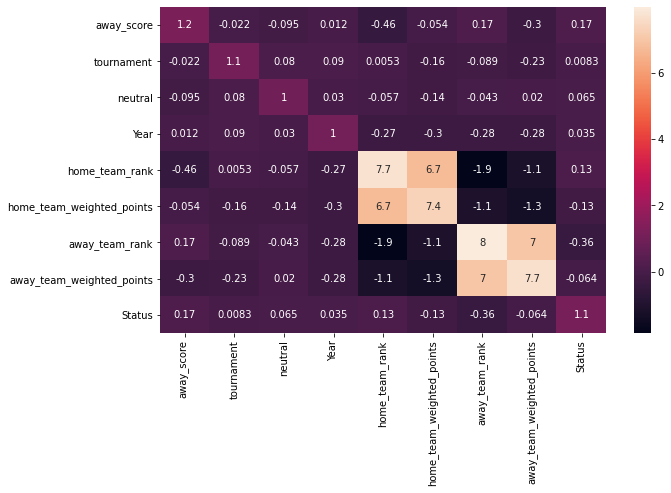

In [107]:
# Creating a heatmap of the vif_df
#
plt.figure(figsize = (10, 6))
sns.heatmap(vif_df, annot = True)
plt.show()

My dataset does not contain high VIF that is greater than 10 so i will not drop them 



#### PREDICTING THE HOME SCORE

In [108]:
# Making my matrix of features x and my dv 
x = f3[['home_team', 'away_team', 'away_score', 'tournament','home_team_rank', 'home_team_weighted_points',
       'away_team_rank', 'away_team_weighted_points']]
y = f3["home_score"]

In [109]:
#encoding my remaining columns
x = pd.get_dummies(x, drop_first=True)
x

,away_score,tournament,home_team_rank,home_team_weighted_points,away_team_rank,away_team_weighted_points,home_team_Albania,home_team_Algeria,home_team_American Samoa,home_team_Andorra,home_team_Angola,home_team_Anguilla,home_team_Antigua and Barbuda,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,home_team_Austria,home_team_Azerbaijan,home_team_Bahrain,home_team_Bangladesh,home_team_Barbados,home_team_Belarus,home_team_Belgium,home_team_Belize,home_team_Benin,home_team_Bermuda,home_team_Bhutan,home_team_Bolivia,home_team_Bosnia and Herzegovina,home_team_Botswana,home_team_Brazil,home_team_British Virgin Islands,home_team_Bulgaria,home_team_Burkina Faso,home_team_Burundi,home_team_Cambodia,home_team_Cameroon,home_team_Canada,home_team_Cayman Islands,...,away_team_Serbia,away_team_Seychelles,away_team_Sierra Leone,away_team_Singapore,away_team_Slovakia,away_team_Slovenia,away_team_Solomon Islands,away_team_Somalia,away_team_South Africa,away_team_South Sudan,away_team_Spain,away_team_Sri Lanka,away_team_Sudan,away_team_Suriname,away_team_Sweden,away_team_Switzerland,away_team_Syria,away_team_Tahiti,away_team_Tajikistan,away_team_Tanzania,away_team_Thailand,away_team_Togo,away_team_Tonga,away_team_Trinidad and Tobago,away_team_Tunisia,away_team_Turkey,away_team_Turkmenistan,away_team_Turks and Caicos Islands,away_team_Uganda,away_team_Ukraine,away_team_United Arab Emirates,away_team_Uruguay,away_team_Uzbekistan,away_team_Vanuatu,away_team_Venezuela,away_team_Vietnam,away_team_Wales,away_team_Yemen,away_team_Zambia,away_team_Zimbabwe
0,1,22,112,287.37,100,349.71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,22,112,287.37,92,371.38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,22,112,287.37,95,375.02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,22,112,287.37,93,377.71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,22,113,276.21,100,349.71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669079,1,22,78,417.41,49,630.02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
669080,1,22,78,417.41,50,637.31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
669081,1,22,78,417.41,50,603.77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
669082,1,22,78,417.41,49,603.77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [110]:
# splitting the data into the training and test set 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 40)

In [111]:
#fitting the dataset into the linear regression and polynomial regression 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 1)
x_poly = poly_reg.fit_transform(x_train)
regressor = LinearRegression()
regressor.fit(x_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
#predicting the test set results
y_pred = regressor.predict(poly_reg.fit_transform(x_test))

In [113]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.8884243018776494
Mean Squared Error: 1.354640649131244
Root Mean Squared Error: 1.1638903080321805


the RMSE is really high in my opinion because the closer the RMSE is to zero the better predictions the model is able to make hence an increase in accuracy but in this case well i can say that it will fairly reasonable predictions but it will probably have a high chance of making wrong predictions lets look at the confusion matric below to see this 

##### CHECKING FOR HETEROSKEDASTICITY

In [114]:
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

-0.0008956416128357283

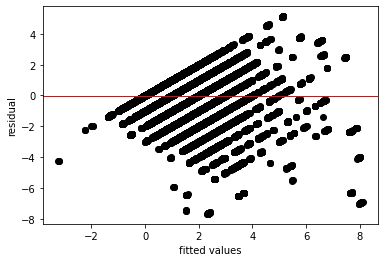

In [116]:
#Residual Plots 
import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

My residuals are somehow centerd around the mean -0.0008956416128357283, with only a few devaitions so a bartlett's test would be better in this case to check the appropriatness of my model 

In [117]:
#Performing Bartlett's test
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


#### PREDICTING THE AWAY SCORE

In [118]:
# Making my matrix of features x and my dv 
x = f3[['home_team', 'away_team', 'home_score', 'tournament','home_team_rank', 'home_team_weighted_points',
       'away_team_rank', 'away_team_weighted_points']]
y = f3["away_score"]

In [119]:
#encoding my remaining columns
x = pd.get_dummies(x, drop_first=True)
x

,home_score,tournament,home_team_rank,home_team_weighted_points,away_team_rank,away_team_weighted_points,home_team_Albania,home_team_Algeria,home_team_American Samoa,home_team_Andorra,home_team_Angola,home_team_Anguilla,home_team_Antigua and Barbuda,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,home_team_Austria,home_team_Azerbaijan,home_team_Bahrain,home_team_Bangladesh,home_team_Barbados,home_team_Belarus,home_team_Belgium,home_team_Belize,home_team_Benin,home_team_Bermuda,home_team_Bhutan,home_team_Bolivia,home_team_Bosnia and Herzegovina,home_team_Botswana,home_team_Brazil,home_team_British Virgin Islands,home_team_Bulgaria,home_team_Burkina Faso,home_team_Burundi,home_team_Cambodia,home_team_Cameroon,home_team_Canada,home_team_Cayman Islands,...,away_team_Serbia,away_team_Seychelles,away_team_Sierra Leone,away_team_Singapore,away_team_Slovakia,away_team_Slovenia,away_team_Solomon Islands,away_team_Somalia,away_team_South Africa,away_team_South Sudan,away_team_Spain,away_team_Sri Lanka,away_team_Sudan,away_team_Suriname,away_team_Sweden,away_team_Switzerland,away_team_Syria,away_team_Tahiti,away_team_Tajikistan,away_team_Tanzania,away_team_Thailand,away_team_Togo,away_team_Tonga,away_team_Trinidad and Tobago,away_team_Tunisia,away_team_Turkey,away_team_Turkmenistan,away_team_Turks and Caicos Islands,away_team_Uganda,away_team_Ukraine,away_team_United Arab Emirates,away_team_Uruguay,away_team_Uzbekistan,away_team_Vanuatu,away_team_Venezuela,away_team_Vietnam,away_team_Wales,away_team_Yemen,away_team_Zambia,away_team_Zimbabwe
0,3,22,112,287.37,100,349.71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,22,112,287.37,92,371.38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,22,112,287.37,95,375.02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,22,112,287.37,93,377.71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,22,113,276.21,100,349.71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669079,1,22,78,417.41,49,630.02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
669080,1,22,78,417.41,50,637.31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
669081,1,22,78,417.41,50,603.77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
669082,1,22,78,417.41,49,603.77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [120]:
# splitting the data into the training and test set 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 40)

In [121]:
#fitting the dataset into the linear regression and polynomial regression 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 1)
x_poly = poly_reg.fit_transform(x_train)
regressor = LinearRegression()
regressor.fit(x_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [122]:
#predicting the test set results
y_pred = regressor.predict(poly_reg.fit_transform(x_test))

In [123]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7644391088556147
Mean Squared Error: 0.9924362723913637
Root Mean Squared Error: 0.9962109577751912


the RMSE is really high in my opinion because the closer the RMSE is to zero the better predictions the model is able to make hence an increase in accuracy but in this case well i can say that it will fairly reasonable predictions but it will probably have a high chance of making wrong predictions lets look at the confusion matric below to see this 

##### CHECKING FOR HETEROSKEDASTICITY

In [124]:
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

-0.003089805777349786

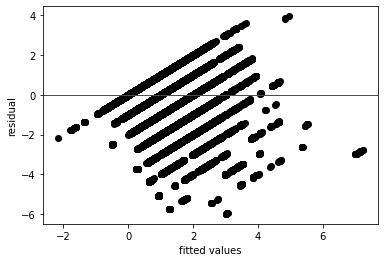

In [125]:
#Residual Plots 
import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

My residuals are somehow centerd around the mean -0.003089805777349786, with only a few devaitions so a bartlett's test would be better in this case to check the appropriatness of my model 

In [126]:
#Performing Bartlett's test
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


### LOGISTIC REGRESSION

#### PREDICTING THE HOME SCORE

In [62]:
# Making my matrix of features x and my dv 
x = f3[['home_team', 'away_team','away_score', "home_score", 'tournament','home_team_rank',
       'away_team_rank']]
y = f3["Status"]
x

,home_team,away_team,away_score,home_score,tournament,home_team_rank,away_team_rank
0,United Arab Emirates,Qatar,1,3,22,112,100
1,United Arab Emirates,Qatar,1,3,22,112,92
2,United Arab Emirates,Qatar,1,3,22,112,95
3,United Arab Emirates,Qatar,1,3,22,112,93
4,United Arab Emirates,Qatar,1,3,22,113,100
...,...,...,...,...,...,...,...
669079,Belarus,Hungary,1,1,22,78,49
669080,Belarus,Hungary,1,1,22,78,50
669081,Belarus,Hungary,1,1,22,78,50
669082,Belarus,Hungary,1,1,22,78,49


In [63]:
#encoding my remaining columns
x = pd.get_dummies(x, drop_first=True)
x

,away_score,home_score,tournament,home_team_rank,away_team_rank,home_team_Albania,home_team_Algeria,home_team_American Samoa,home_team_Andorra,home_team_Angola,home_team_Anguilla,home_team_Antigua and Barbuda,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,home_team_Austria,home_team_Azerbaijan,home_team_Bahrain,home_team_Bangladesh,home_team_Barbados,home_team_Belarus,home_team_Belgium,home_team_Belize,home_team_Benin,home_team_Bermuda,home_team_Bhutan,home_team_Bolivia,home_team_Bosnia and Herzegovina,home_team_Botswana,home_team_Brazil,home_team_British Virgin Islands,home_team_Bulgaria,home_team_Burkina Faso,home_team_Burundi,home_team_Cambodia,home_team_Cameroon,home_team_Canada,home_team_Cayman Islands,home_team_Central African Republic,...,away_team_Serbia,away_team_Seychelles,away_team_Sierra Leone,away_team_Singapore,away_team_Slovakia,away_team_Slovenia,away_team_Solomon Islands,away_team_Somalia,away_team_South Africa,away_team_South Sudan,away_team_Spain,away_team_Sri Lanka,away_team_Sudan,away_team_Suriname,away_team_Sweden,away_team_Switzerland,away_team_Syria,away_team_Tahiti,away_team_Tajikistan,away_team_Tanzania,away_team_Thailand,away_team_Togo,away_team_Tonga,away_team_Trinidad and Tobago,away_team_Tunisia,away_team_Turkey,away_team_Turkmenistan,away_team_Turks and Caicos Islands,away_team_Uganda,away_team_Ukraine,away_team_United Arab Emirates,away_team_Uruguay,away_team_Uzbekistan,away_team_Vanuatu,away_team_Venezuela,away_team_Vietnam,away_team_Wales,away_team_Yemen,away_team_Zambia,away_team_Zimbabwe
0,1,3,22,112,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,3,22,112,92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,3,22,112,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,3,22,112,93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,3,22,113,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669079,1,1,22,78,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
669080,1,1,22,78,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
669081,1,1,22,78,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
669082,1,1,22,78,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
# splitting the data into the training and test set 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 40)

In [65]:
# We apply feature scaling because applying will improve the training perfomance and therefore the final predictions 
# do this after the training set and test set inorder to avoid infomation leakage in the test set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [66]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter = 1000)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
#predicting the test set results
y_pred = classifier.predict(x_test)

In [98]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


okay the RMSE IS 0.0 Meaning my model has 100% accuracy this indcates there may be higher chances of overffiting i need to investugate further to ensure my data is not overfitted

###### Performing K-cross validation

In [82]:
# Applying k-Fold Cross Validation
#Finding the measure of  accuracy machine learning models
#finding the accuracy on the 10 test folds
from sklearn.model_selection import cross_val_score
# getting the list using the cross_val_score function and then computing the mean of all the accuracies in the list 
#Parameters : 1.estimator(classifier used), 2.Features of the training set 3. dv of the training set, 4. Number of folds to use
accuracies = cross_val_score(estimator=classifier, X = x_train, y = y_train, cv = 10)

#This print will compute the mean of the 10 accuracies within that list multiplying by * 100 in-order to get the % 
print('Accuracy: {:.2f} %'.format(accuracies.mean()*100)) #Printing the mean in percentage

# Getting the variance in the accuracies so we will print the sd
print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100)) #Printing the sd in percentage

Accuracy: 100.00 %
Standard Deviation: 0.00 %


After cross validation we can see that i am getting 100 % accuracy and an sd of 0.0, im not sure if its because of overffiting but i need to find more methods to test this aacuracy 

###### Performing grid search


In [ ]:
'''
from sklearn.model_selection import GridSearchCV
parameters = [{
    "C": [1.0],
    "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "multi_class" : ["auto", "ovr", "multinomial"]
}]

#finding the accuracy on the 10 test folds
#the n_jobs is to set all your process to run the grid search
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy',
                           cv = 10, n_jobs = -1)
grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)
'''

# Conclusions

1) The dataset included many outliers and also quite a number of missing values after merging in conclusion i feel like the data we recieved was not the best 

2) The dataset should include more features in-order to come up with more conclusive analysis and modelling approach 

3) Polynomial and Logistic regression may not be the best moddeling algorthims to use

     1. Polynomial RMSE was not the best for both predictions 
        RMSE FOR HOME SCORE PREDICTION = 1.1638903080321805
        RMSE FOR AWAY SCORE PREDICTION = 0.9962109577751912
      RMSE has to be closer to zero in-oder to produce strong and accurate predictions in the moddeling 

    2. Logistic approach gave us some preety good RMSE of 0.0, which is usually not achievable, this means that either our model is overfitted or there is somethign going on within the matrix of features in any case this two moddelling algorthims are not the best 

    3. This dataset might be better suited for more in-depth and heavy analysis rather than modelling, maybe using visualisations like tableau to gain more insights into the data may help us draw intresting conclusions

